# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [47]:
# Importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn libraries for Prediction and Test - Train Split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [48]:
# Importing the test data and train data for Titanic Challenge

titanic_train_data = pd.read_csv('train.csv')

titanic_test_data = pd.read_csv('test.csv')

titanic_test_id = titanic_test_data.PassengerId

# 1 - Data Preparation and Data Cleaning

In [49]:
# Checking the Head of Train Data 

titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# Checking the Head of Test Data 

titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
# Checking the Shape of Train Data

titanic_train_data.shape

(891, 12)

In [52]:
# Checking the Shape of Test Data

titanic_test_data.shape

(418, 11)

In [53]:
# Checking for null values in Train Data

titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
# Checking for null values in Test Data

titanic_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Let's drop the Cabin variable, since it has too many missing values

In [55]:
# Dropping the Cabin Column from Train Data

titanic_train_data = titanic_train_data.drop('Cabin', axis=1) 

In [56]:
# Dropping the Cabin Column from Test Data

titanic_test_data = titanic_test_data.drop('Cabin', axis=1) 

In [57]:
# Checking the Head of Train Data Again

titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
# Checking the Head of Train Data Again

titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


C:\Users\Mrinal Dhar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


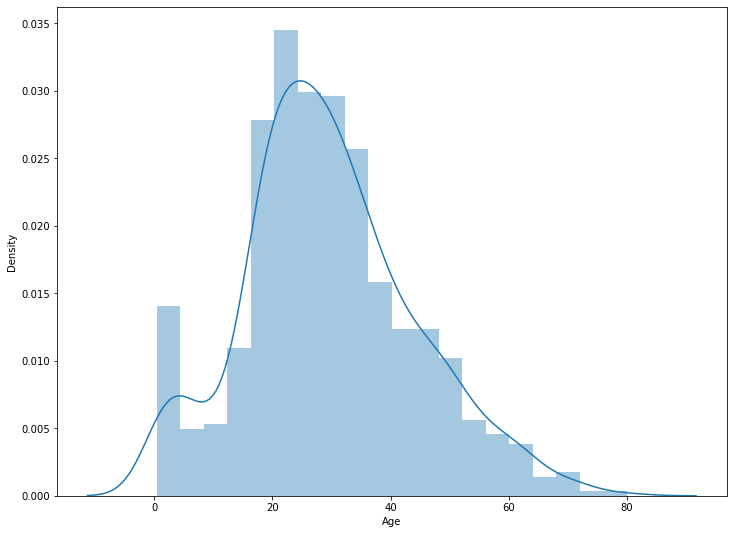

In [59]:
# Checking the Age Distribution 

# Setting the Figure Size

plt.figure(figsize=(12, 9))

# Using Heatmap

sns.distplot(titanic_train_data["Age"])

# Plotting the Heatmap

plt.show()

### Inference

Here we can see that the data is right skewed , so we would prefer to take the median for the missing values in the Age Column.

# 2 - Outlier Treatment

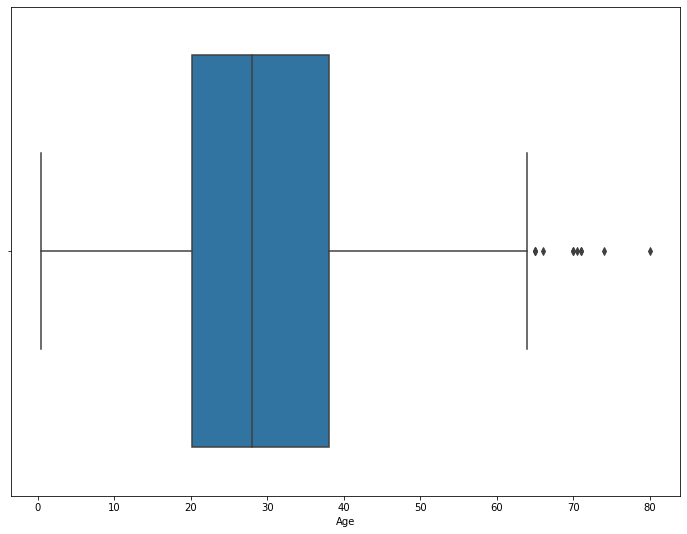

In [60]:
# Setting the Figure Size

plt.figure(figsize=(12, 9))

# Checking for outliers in Age Column

sns.boxplot( x="Age", data= titanic_train_data )

# Plotting the Box Plot

plt.show()

### Inference

From the above boxplot we can observe that , there are some outliers we need to handle.

In [61]:
# Using Z-Score to remove the outliers for the Train Data

outliers=[]

def age_outliers(data):
    
    threshold = 3
    
    mean = np.mean(data)
    
    std = np.std(data)
    
    for i in data:
        
        Z_score = (i-mean)/std
        
        if np.abs(Z_score)>threshold:
            
            outliers.append(i)
    
    return outliers


age_outliers( titanic_train_data["Age"] )

[80.0, 74.0]

In [62]:
# Outliers Removal 

for i in range(len(titanic_train_data["Age"])):
    
    # Dropping all Ages whose had Z-Score higher than the threshold and are appending into the Outliers List
    
    if(titanic_train_data["Age"][i] in outliers):
        
        titanic_train_data = titanic_train_data.drop(i)

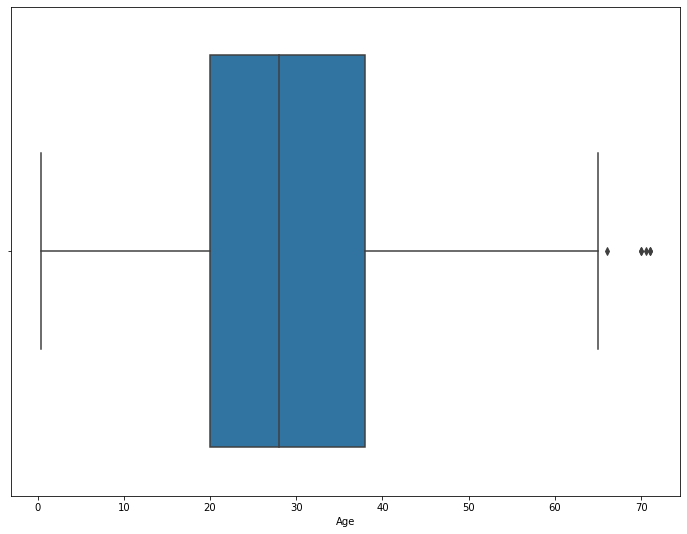

In [63]:
# Setting the Figure Size

plt.figure(figsize=(12, 9))

# Checking for Outliers Again via Box Plot

sns.boxplot( x="Age", data= titanic_train_data )

# Plotting the Box Plot

plt.show()

### Inference

We can see that there are still some outliers in the range from 65-70 and we will be keeping them.

We will be replacing Age with Median after the outlier removal

In [64]:
# Replacing Age Column with median after removing outliers from both Train and Test Data

titanic_train_data["Age"].fillna(titanic_train_data["Age"].median(skipna=True), inplace=True)

titanic_test_data["Age"].fillna(titanic_test_data["Age"].median(skipna=True), inplace=True)

In [65]:
# Checking for null values in Train Data and Test Data

print(titanic_train_data.isnull().sum())

print(titanic_test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


### Inference

Here we can see two missing values for Embarked Column

We will be replacing it with the most frequently occuring value we see for Embarked.

In [66]:
# Describing the Embark Column

titanic_train_data['Embarked'].describe()

count     887
unique      3
top         S
freq      642
Name: Embarked, dtype: object

In [67]:
# Here S is top so we will be replacing null values by S

# Setting the Frequently Occuring Value

freq_occur_value = 'S'

# Setting the Titanic Train Data

data = [titanic_train_data]

# Running a for loop on the Titanic Train Data to fill null values with 'S' (freq_occur_value)

for dataset in data:
    
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_occur_value)

# 3 - Data Visualization ( EDA )

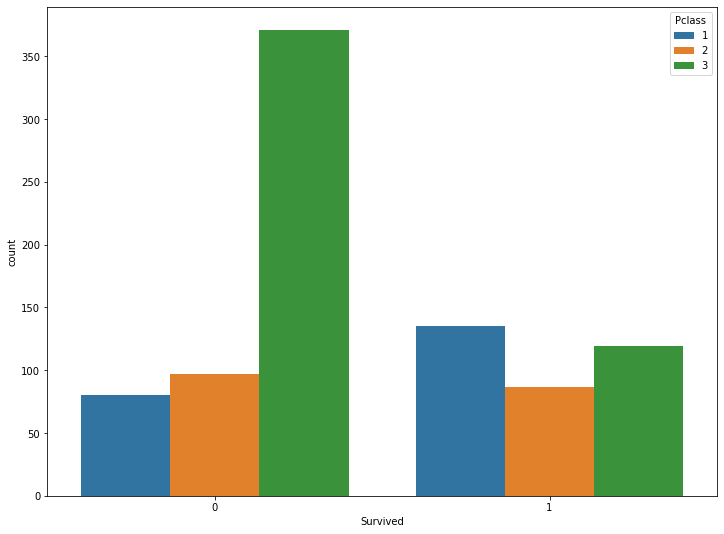

In [68]:
# Setting the Figure Size

plt.figure(figsize=(12, 9))

# Using a Count Plot to check the chances of the Passengers surviving on basis of their Classes in the Ship

sns.countplot(x='Survived',hue='Pclass',data= titanic_train_data)

# Plotting the Count Plot

plt.show()

### Inference

Passengers in Class 1 have a higher chance of survival than other classes, so we can conclude here that this feature is important. 

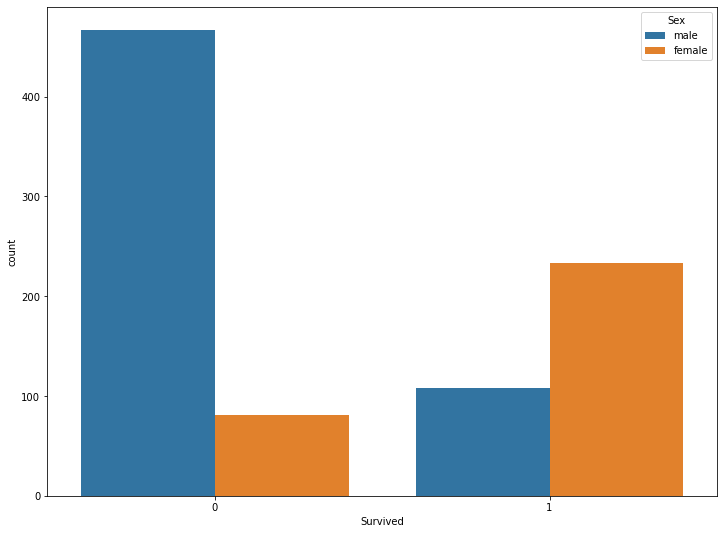

In [69]:
# Setting the Figure Size

plt.figure(figsize=(12, 9))

# Using a Count Plot to check the chances of the Passengers surviving on basis of their Sex in the Ship

sns.countplot(x='Survived',hue='Sex',data= titanic_train_data)

# Plotting the Count Plot

plt.show()

### Inference

From the above Count Plot we can conclude that Female have a higher chance of survival then Male Passengers.

C:\Users\Mrinal Dhar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


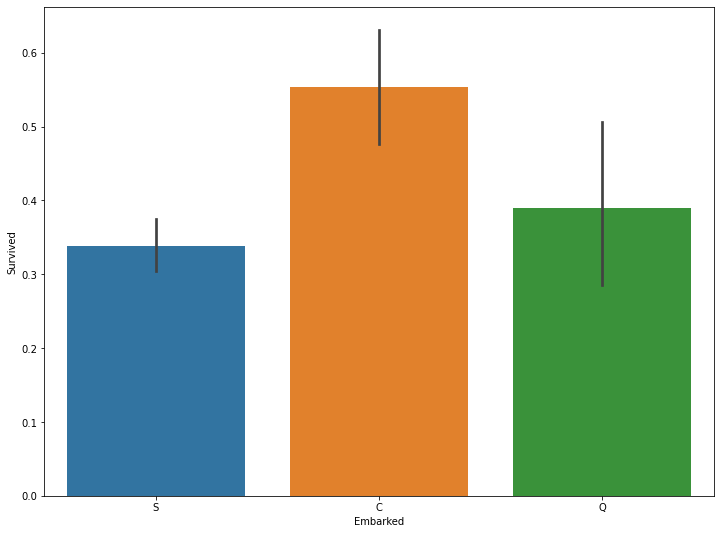

In [70]:
# Setting the Figure Size

plt.figure(figsize=(12, 9))

# Using a Bar Plot to check the chances of the Passengers surviving on basis from where they boarded for the Ship Journey

sns.barplot('Embarked', 'Survived', data= titanic_train_data)

# Plotting the Count Plot

plt.show()

### Inference

- Passengers that have boarded from Cherbourg have a higher chance of survival than other Passengers.



- Passengers that have boarded from Queenstown have a higher chance of survival than Passengers who have boarded from Southhampton.

## Dummy Variable Creation

In [71]:
# Creating a Dummy Variable for the Train and Test data

titanic_train_data = pd.get_dummies(titanic_train_data,columns = ["Sex","Embarked"])

titanic_test_data = pd.get_dummies(titanic_test_data,columns = ["Sex","Embarked"])

## Correlation Matrix for Train Data

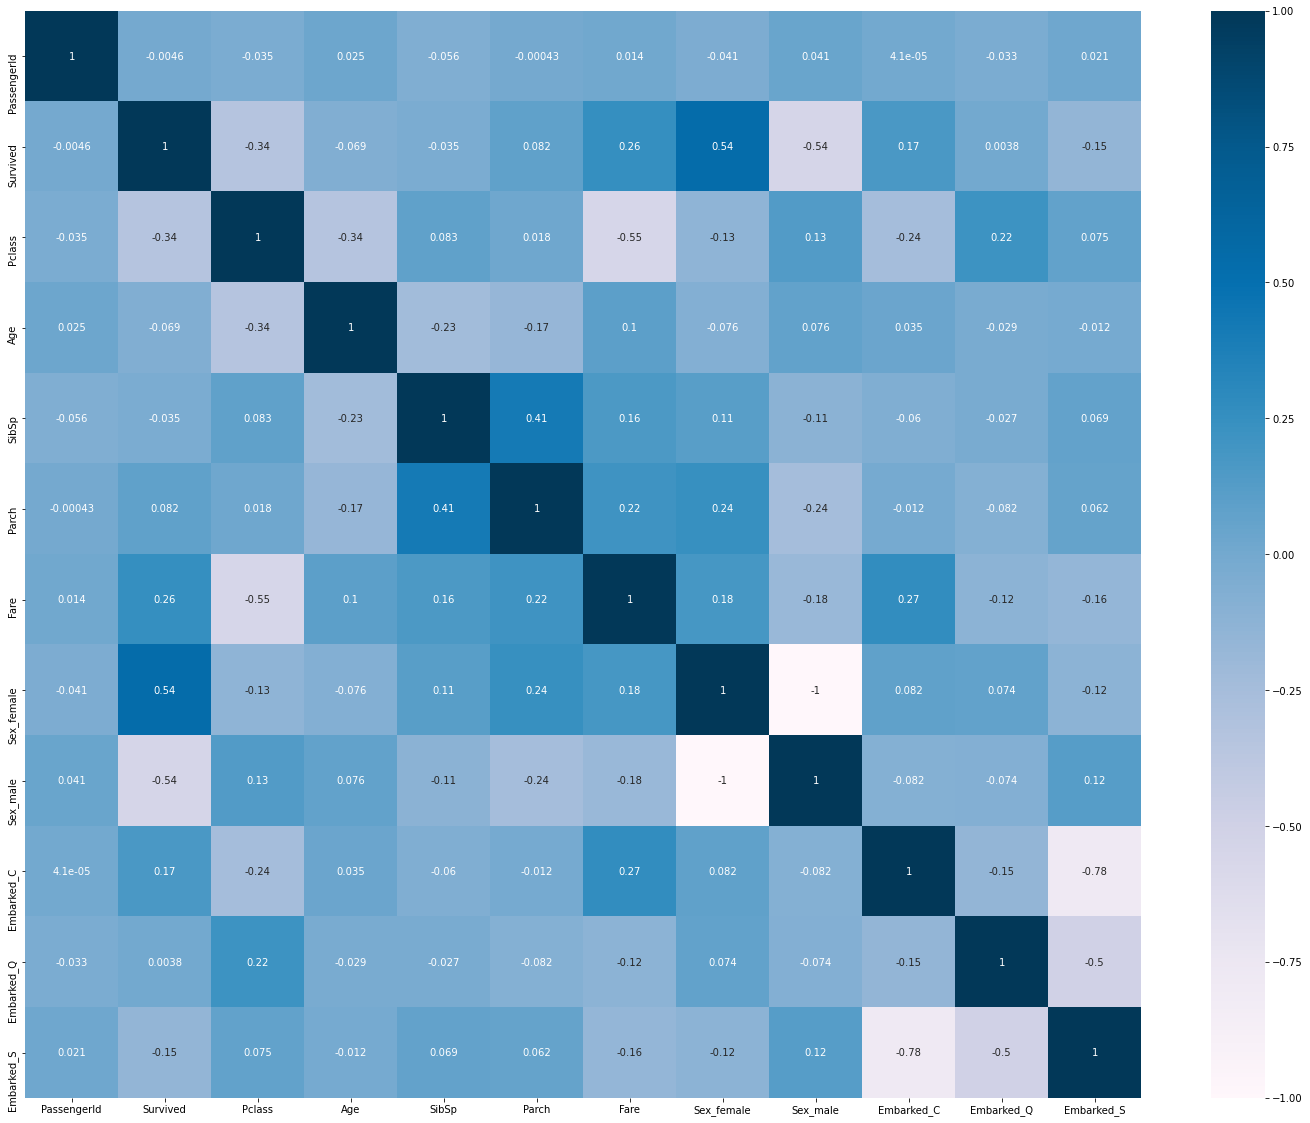

In [72]:
# Configuring the figure size

plt.figure(figsize = (25,20))

# Plotting the heatmap for the new bike sharing dataset

sns.heatmap(titanic_train_data.corr(), annot = True, cmap="PuBu")

plt.show()

### Inference

- From the above correlation matrix we can infer that Passenger Id is close to 0 with respect to Survived i.e It does not have any relation with the Survival of the Passenger.




- So we can drop Passenger Id along with Parch.

In [73]:
# Dropping the columns mentioned in the Inference

titanic_drop_column=['PassengerId', 'Parch', 'Ticket','Name']

titanic_train_data.drop(titanic_drop_column, axis=1, inplace = True)

titanic_test_data.drop(titanic_drop_column, axis=1, inplace = True)

In [74]:
# Fare has one null value which we will replace with the median 

titanic_test_data["Fare"].fillna(titanic_test_data["Fare"].median(skipna=True), inplace=True)

# 4 - Model Building

## Train - Test Split

In [75]:

X = titanic_train_data.drop('Survived',axis=1) # Features / Independent Variable

y = titanic_train_data['Survived'] # Target Variable / Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 100)

## Scaling

- The scaling of a feature basically means it has Mean = 0 and Standard Deviation = 1



- Convergence Warnings come due to Variables not being Scaled.

In [76]:
# Setting the scaler

scaler = StandardScaler()

# Fitting and Transforming the Model on Train Data

X_train = scaler.fit_transform(X_train)

# Fitting and Transforming the Model on Train Data

X_test = scaler.transform(X_test)

## Applying Logistic Regression Algorithm on Train Data

In [77]:
# Setting the Log Model

logmodel = LogisticRegression()

# Fitting the Log Model

logmodel.fit(X_train,y_train)

LogisticRegression()

# 5 - Model Evaluation

## Using Confusion Matrix and Accuracy Score for Prediction

### Prediction on Train Data

In [80]:
# Confusion Matrix

# Setting the Prediction

predictions = logmodel.predict(X_train)

# Setting the Accuracy

accuracy=confusion_matrix(y_train,predictions)

# Checking the Accuracy on Train Data

accuracy

array([[329,  59],
       [ 66, 168]], dtype=int64)

In [81]:
# Checking the Accuracy Score on Train Data

# Setting the Accuracy Score

accuracy=accuracy_score(y_train,predictions)

# Checking the Accuracy Score

accuracy

0.7990353697749196

### Prediction on Test Data

In [78]:
# Confusion Matrix

# Setting the Prediction

predictions = logmodel.predict(X_test)

# Setting the Accuracy

accuracy=confusion_matrix(y_test,predictions)

# Checking the Accuracy on Test Data

accuracy

array([[138,  22],
       [ 30,  77]], dtype=int64)

In [79]:
# Checking the Accuracy Score on Test Data

# Setting the Accuracy Score

accuracy=accuracy_score(y_test,predictions)

# Checking the Accuracy Score

accuracy

0.8052434456928839

# 6 - Final Analysis